In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

65.9179452790406 179.449342966205
-25.631124007881695 -141.93710266711946
16.97379916516715 -10.468916230447178
79.49564276733068 42.19366726208921
-35.577963954407 134.8897515205869
-81.69145030768308 -60.93183887995504
-28.95509199196689 -24.82486448579138
-82.35647091391334 158.62059586343275
43.57563757112476 -149.5420849213968
41.550380953366925 30.391036394043567
-16.649323307211745 -111.9814625560001
25.301034210361465 -104.01456435828031
42.13298149748451 -67.09377752868109
-61.33687576262335 -60.68400629202006
-5.04974212857006 81.41705211939058
-84.65921779852064 115.89975467031576
-80.7082499872452 -133.72913494441121
73.09501808298566 95.92874696856552
-68.83420500208241 -70.25347644645589
-34.95796025988602 -97.4714845793342
-6.4696708971765275 -119.62864750837034
-68.18609091446608 169.02974773665585
34.88512730433807 -3.01917721892238
73.06998386077478 -101.94341041263354
-33.63566712246713 83.33735849645961
-86.65699656277647 60.38685832061091
16.880410655684912 162.653

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 85.05,
  'feels_like': 86.77,
  'temp_min': 78.75,
  'temp_max': 93.79,
  'pressure': 1015,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 120},
 'clouds': {'all': 20},
 'dt': 1659548084,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659519526,
  'sunset': 1659571320},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Get the JSON data.
boston_data = city_weather.json()

In [12]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1659519526,
 'sunset': 1659571320}

In [13]:
boston_data['sys']["country"]

'US'

In [14]:
boston_data['dt']

1659548084

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 93.79 51 20 12.66


In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nioro
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | agva
City not found. Skipping...
Processing Record 11 of Set 1 | nazas
Processing Record 12 of Set 1 | yarmouth
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | nador
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Se

Processing Record 33 of Set 4 | lakes entrance
Processing Record 34 of Set 4 | georgetown
Processing Record 35 of Set 4 | craig
Processing Record 36 of Set 4 | san policarpo
Processing Record 37 of Set 4 | solnechnyy
Processing Record 38 of Set 4 | naze
Processing Record 39 of Set 4 | acarau
Processing Record 40 of Set 4 | vao
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | eskasem
City not found. Skipping...
Processing Record 43 of Set 4 | ballina
Processing Record 44 of Set 4 | soavinandriana
Processing Record 45 of Set 4 | plettenberg bay
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | nicoya
Processing Record 48 of Set 4 | champasak
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | mayumba
Processing Record 1 of Set 5 | auki
Processing Record 2 of Set 5 | khrebtovaya
Processing Record 3 of Set 5 | narayanpet
Processing Record 4 of Set 5 | kazminskoye
City not found. Skipping...
Processing Record 5 of Set 5 | boen

Processing Record 24 of Set 8 | batagay
Processing Record 25 of Set 8 | santa helena de goias
Processing Record 26 of Set 8 | eyl
Processing Record 27 of Set 8 | araouane
Processing Record 28 of Set 8 | namatanai
Processing Record 29 of Set 8 | klaksvik
Processing Record 30 of Set 8 | serik
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | bargal
City not found. Skipping...
Processing Record 33 of Set 8 | agua verde
Processing Record 34 of Set 8 | el buen pastor
City not found. Skipping...
Processing Record 35 of Set 8 | nanchang
Processing Record 36 of Set 8 | linxia
Processing Record 37 of Set 8 | henties bay
Processing Record 38 of Set 8 | tezu
Processing Record 39 of Set 8 | kilindoni
Processing Record 40 of Set 8 | mercedes
Processing Record 41 of Set 8 | ribeira grande
Processing Record 42 of Set 8 | rungata
City not found. Skipping...
Processing Record 43 of Set 8 | mwene-ditu
Processing Record 44 of Set 8 | lubao
Processing Record 45 of Set 8 | rio pa

Processing Record 9 of Set 12 | hami
Processing Record 10 of Set 12 | cortez
Processing Record 11 of Set 12 | valleyview
Processing Record 12 of Set 12 | lagdo
Processing Record 13 of Set 12 | jijiga
Processing Record 14 of Set 12 | pionerskiy
Processing Record 15 of Set 12 | cabo san lucas
Processing Record 16 of Set 12 | lompoc
Processing Record 17 of Set 12 | maniitsoq
Processing Record 18 of Set 12 | bakchar
Processing Record 19 of Set 12 | shiyan
Processing Record 20 of Set 12 | balkhash
Processing Record 21 of Set 12 | taunggyi
Processing Record 22 of Set 12 | nantucket
Processing Record 23 of Set 12 | comodoro rivadavia
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | pangody
Processing Record 26 of Set 12 | bitung
Processing Record 27 of Set 12 | strezhevoy
Processing Record 28 of Set 12 | bhusawal
Processing Record 29 of Set 12 | franklin
Processing Record 30 of Set 12 | singaparna
Processing Record 31 of Set 12 | hailar
Processing Record 32 of Set 12 |

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Anadyr,64.7500,177.4833,54.10,71,0,4.47,RU,2022-08-03 17:38:27
1,Rikitea,-23.1203,-134.9692,72.09,72,82,16.15,PF,2022-08-03 17:38:28
2,Nioro,13.3500,-15.7500,76.91,88,100,4.94,GM,2022-08-03 17:38:28
3,Ostrovnoy,68.0531,39.5131,57.70,86,95,12.86,RU,2022-08-03 17:37:31
4,Port Lincoln,-34.7333,135.8667,56.43,66,0,22.30,AU,2022-08-03 17:35:32
5,Ushuaia,-54.8000,-68.3000,40.62,87,75,0.00,AR,2022-08-03 17:34:41
6,Vila Velha,-20.3297,-40.2925,78.75,84,40,13.80,BR,2022-08-03 17:36:08
7,Bluff,-46.6000,168.3333,44.80,72,100,15.73,NZ,2022-08-03 17:38:30
8,Kodiak,57.7900,-152.4072,62.11,59,0,10.36,US,2022-08-03 17:33:39
9,Nazas,25.2333,-104.1333,89.46,28,50,3.15,MX,2022-08-03 17:38:31


In [19]:
#Changing order
new_city_data_df=city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

new_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Anadyr,RU,2022-08-03 17:38:27,64.7500,177.4833,54.10,71,0,4.47
1,Rikitea,PF,2022-08-03 17:38:28,-23.1203,-134.9692,72.09,72,82,16.15
2,Nioro,GM,2022-08-03 17:38:28,13.3500,-15.7500,76.91,88,100,4.94
3,Ostrovnoy,RU,2022-08-03 17:37:31,68.0531,39.5131,57.70,86,95,12.86
4,Port Lincoln,AU,2022-08-03 17:35:32,-34.7333,135.8667,56.43,66,0,22.30


In [20]:
# Create the output file (CSV).
new_city_data_df = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(new_city_data_df, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

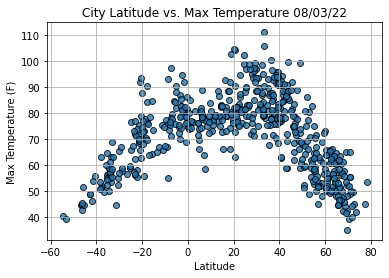

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

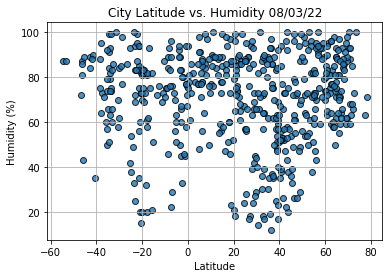

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

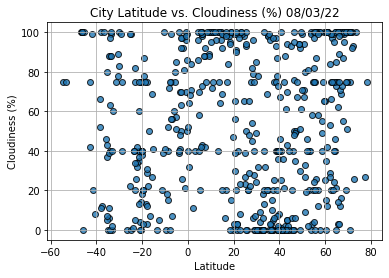

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

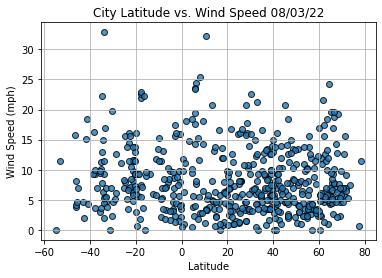

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                     Khatanga
Lat                       71.9667
Lng                         102.5
Max Temp                    49.64
Humidity                       66
Cloudiness                     93
Wind Speed                   7.02
Country                        RU
Date          2022-08-03 17:35:50
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
537     True
538     True
539     True
540    False
541     True
Name: Lat, Length: 542, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Anadyr,64.7500,177.4833,54.10,71,0,4.47,RU,2022-08-03 17:38:27
2,Nioro,13.3500,-15.7500,76.91,88,100,4.94,GM,2022-08-03 17:38:28
3,Ostrovnoy,68.0531,39.5131,57.70,86,95,12.86,RU,2022-08-03 17:37:31
8,Kodiak,57.7900,-152.4072,62.11,59,0,10.36,US,2022-08-03 17:33:39
9,Nazas,25.2333,-104.1333,89.46,28,50,3.15,MX,2022-08-03 17:38:31
...,...,...,...,...,...,...,...,...,...
536,Tatawin,32.9297,10.4518,81.54,57,0,21.23,TN,2022-08-03 17:53:47
537,Kenai,60.5544,-151.2583,64.02,82,0,0.00,US,2022-08-03 17:53:47
538,San Quintin,30.4833,-115.9500,75.18,73,78,15.93,MX,2022-08-03 17:53:48
539,Baihar,22.1000,80.5500,75.13,90,97,2.13,IN,2022-08-03 17:53:48


In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Anadyr,64.7500,177.4833,54.10,71,0,4.47,RU,2022-08-03 17:38:27
2,Nioro,13.3500,-15.7500,76.91,88,100,4.94,GM,2022-08-03 17:38:28
3,Ostrovnoy,68.0531,39.5131,57.70,86,95,12.86,RU,2022-08-03 17:37:31
8,Kodiak,57.7900,-152.4072,62.11,59,0,10.36,US,2022-08-03 17:33:39
9,Nazas,25.2333,-104.1333,89.46,28,50,3.15,MX,2022-08-03 17:38:31


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

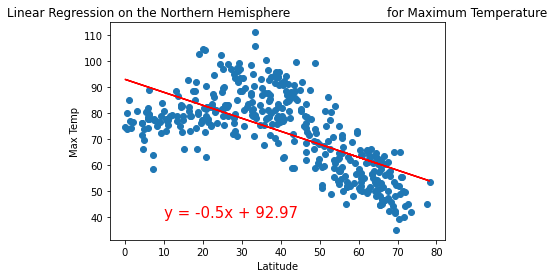

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

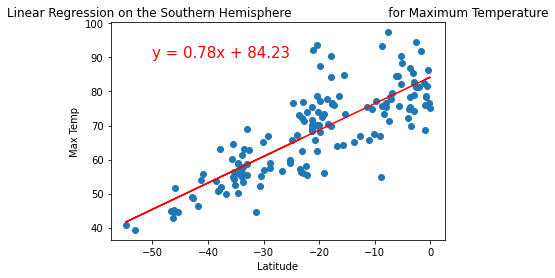

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

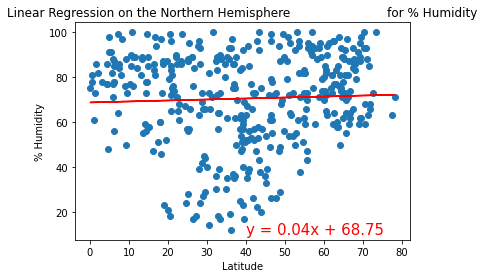

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

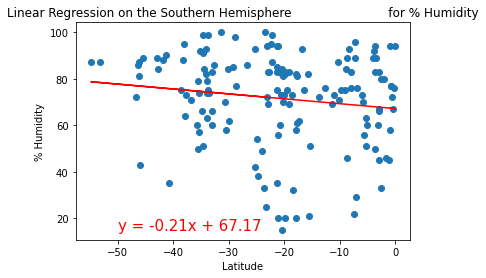

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

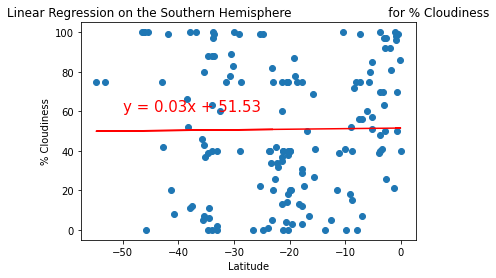

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

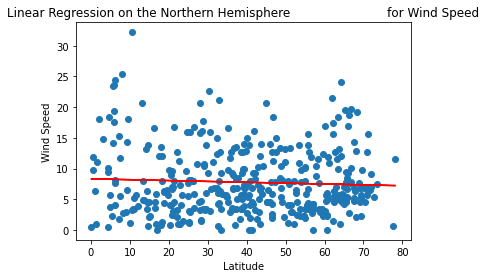

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

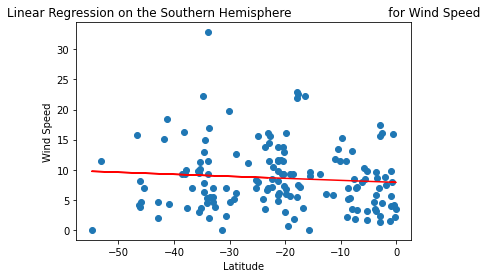

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))